 # **Cyclistic Bike-Share**

## **I) Scenario :**

### **1. Description :**  
You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations. 

### **2. Characters and teams**
- **Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use the bikes to commute to work each day. 
- **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- **Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how you, as a junior data analyst, can help Cyclisitc achieve them.
- **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### **3. About the company**
- In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of **5,824 bicycles** that are geotracked and locked into a network of **692 stations** across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
- Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: **single-ride passes**, **full-day passes,** and **annual memberships.** Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
- Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### **4. The problem**

1. **How do annual members and casual riders use Cyclistic bikes differently?** [Data Analyst job]
2. **Why would casual riders buy Cyclistic annual memberships?**
3. **How can Cyclistic use digital media to influence casual riders to become members?**

### **5. The data**

1. Use Cyclistic’s historical trip data to analyze and identify trends.
2. Download the previous 12 months of [Cyclistic trip data](https://divvy-tripdata.s3.amazonaws.com/index.html). [2024 for this case]
3. The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). This is public data that you can use to explore how different customer types are using Cyclistic bikes.

## **II) Data Exploration EDA**

In [1]:
# OPERATIONAL LIBRARIES 
import pandas as pd 
import numpy as np  
from datetime import datetime
# VISUALISATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import zipfile
import io

# Load zip files (12 months of Cyclistic data year 2024): 
final_df = pd.DataFrame()

for i in range(1, 10):
    file_name = f"20240{i}-divvy-tripdata.zip"
    with zipfile.ZipFile(file_name) as z:
        # Find the CSV file (ignore hidden files)
        csv_files = [f for f in z.namelist() if f.endswith('.csv') and not f.startswith('__MACOSX')]
        if len(csv_files) != 1:
            raise ValueError(f"Expected one CSV file in {file_name}, found: {csv_files}")
        with z.open(csv_files[0]) as f:
            df = pd.read_csv(f)
            final_df = pd.concat([final_df, df], ignore_index=True)

for i in range(10, 13):
    file_name = f"2024{i}-divvy-tripdata.zip"
    with zipfile.ZipFile(file_name) as z:
        csv_files = [f for f in z.namelist() if f.endswith('.csv') and not f.startswith('__MACOSX')]
        if len(csv_files) != 1:
            raise ValueError(f"Expected one CSV file in {file_name}, found: {csv_files}")
        with z.open(csv_files[0]) as f:
            df = pd.read_csv(f)
            final_df = pd.concat([final_df, df], ignore_index=True)

### **1. Exploration & Cleaning :**

In [ ]:
final_df.reset_index(drop=True, inplace=True) # this will reset the index of the final DataFrame.
final_df.head() # This will display the first five rows.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


In [ ]:
final_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
final_df.info() 
# We have 5 860 568 rows or trips and 13 columns. 
# We have geographic data, stations data, user types, time data, bike types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB


In [ ]:
# Check for missing values: show the percentage
print(round(final_df.isna().sum() / len(final_df) * 100, 2))
# There are few missing values in end stations. However, we have around 20% missing values in station names and ids which are not critical for our analysis.
# We can drop missing rows in longitude and latitude data as they are critical for our analysis.
final_df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    18.33
start_station_id      18.33
end_station_name      18.85
end_station_id        18.85
start_lat              0.00
start_lng              0.00
end_lat                0.12
end_lng                0.12
member_casual          0.00
dtype: float64


In [ ]:
# Check for duplicates: 
final_df.duplicated().sum() # There are no duplicates in the data. 

0

In [ ]:
# let's check duplicates in ride_id:
final_df['ride_id'].duplicated().sum() # There are 171 duplicates in ride_id.
# Let's remove the 171 duplicates in ride_id
final_df = final_df[~final_df['ride_id'].duplicated(keep='first')].reset_index(drop=True)

In [ ]:
# Let's check unique values in some columns: 
print(final_df['rideable_type'].unique()) # ['electric_bike' 'classic_bike' 'electric_scooter']
print(final_df['member_casual'].unique()) # ['member' 'casual']

['electric_bike' 'classic_bike' 'electric_scooter']
['member' 'casual']


### **2. Transformation & Extraction :** 

In [ ]:
# Transform datatypes: started_at and ended_at are objects, we need to convert them to datetime
final_df['started_at'] = pd.to_datetime(final_df['started_at'], format='mixed')
final_df['ended_at'] = pd.to_datetime(final_df['ended_at'], format='mixed')


In [ ]:
# Let's create new columns for the duration of the trip, season, month, day of the week, and hour of the day
final_df['duration_min'] = round((final_df['ended_at'] - final_df['started_at']).dt.total_seconds() / 60, 2)  # duration in minutes
final_df['month'] = final_df['started_at'].dt.month_name()  # month name
final_df['day_of_week'] = final_df['started_at'].dt.day_name()  # day of the week
final_df['hour'] = final_df['started_at'].dt.hour  # hour of the day

In [ ]:
# Add the season : Winter, Spring, Summer, Fall
# define a function that crawls the month and returns the season
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'
# apply the function to the month column
final_df['season'] = final_df['month'].apply(get_season)  # season

In [ ]:
# Let's calculate a new column for the trip distance using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers.
    
    return c * r
# Calculate the distance for each trip
final_df['distance_kms'] = haversine(final_df['start_lat'], final_df['start_lng'], final_df['end_lat'], final_df['end_lng'])

In [ ]:
# Let's use another dataset with just critical columns for our analysis: 
data = final_df.copy();
data = data.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis=1).reset_index(drop=True)
data.head() # This will display the first five rows of the new dataset.

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,month,day_of_week,hour,season,distance_kms
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,41.903267,-87.634737,41.889177,-87.638506,member,7.53,January,Friday,15,Winter,1.597552
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,41.902937,-87.634440,41.889177,-87.638506,member,7.22,January,Monday,15,Winter,1.566573
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,41.902951,-87.634470,41.889177,-87.638506,member,8.00,January,Saturday,12,Winter,1.567650
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,41.884295,-87.633963,41.921822,-87.644140,member,29.82,January,Monday,16,Winter,4.256963
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,41.948797,-87.675278,41.889177,-87.638506,member,26.20,January,Wednesday,5,Winter,7.294281


## **III) Statistical Analysis**

### **1. Data summary with describe method :** 

In [ ]:
# Use describe to get a summary of the data : 
data[['duration_min', 'hour', 'distance_kms']].describe().T
# We can see that duration is negative which seems odd. Let's check this column closely

,count,mean,std,min,25%,50%,75%,max
duration_min,5853165.0,15.480359,32.825698,-2748.32,5.540000,9.700000,17.21000,1509.370000
hour,5853165.0,14.045529,4.881684,0.00,11.000000,15.000000,18.00000,23.000000
distance_kms,5853165.0,2.152720,5.117905,0.00,0.875232,1.569688,2.79713,5758.134884


In [ ]:
len(data[data['duration_min'] <= 0]) # We have 786 trips with negative or zero duration.
# Let's drop these rows as they are not valid trips
data = data[data['duration_min'] > 0].reset_index(drop=True)
data[['duration_min', 'hour', 'distance_kms']].describe().T

,count,mean,std,min,25%,50%,75%,max
duration_min,5852379.0,15.483829,32.802176,0.01,5.540000,9.700000,17.21000,1509.370000
hour,5852379.0,14.045578,4.881546,0.00,11.000000,15.000000,18.00000,23.000000
distance_kms,5852379.0,2.152969,5.118195,0.00,0.875469,1.569851,2.79755,5758.134884


In [ ]:
# This is a summary of categorical data:  
data.describe(include='object')

,ride_id,rideable_type,member_casual,month,day_of_week,season
count,5852379,5852379,5852379,5852379,5852379,5852379
unique,5852379,3,2,12,7,4
top,C1D650626C8C899A,electric_bike,member,September,Saturday,Summer
freq,1,2979802,3706987,820156,923495,2212261


### **2. Aggregation using groupby method :** 

In [ ]:
agg_bike_type= data.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')
agg_month= data.groupby(['member_casual', 'month']).size().reset_index(name='count')
agg_hour= data.groupby(['member_casual', 'hour']).size().reset_index(name='count')
agg_day = data.groupby(['member_casual', 'day_of_week']).size().reset_index(name='count')
agg_season = data.groupby(['member_casual', 'season']).size().reset_index(name='count')

### **3. Visualization :** 

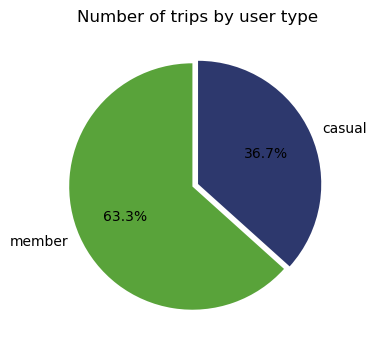

In [ ]:
# Number of trips by user type
colors = ['#59A33A', '#2D386D']  # member, casual
data['member_casual'].value_counts().plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    explode=(0.05, 0),
    figsize=(4, 4)
)
plt.title('Number of trips by user type')
plt.ylabel('')
plt.show()

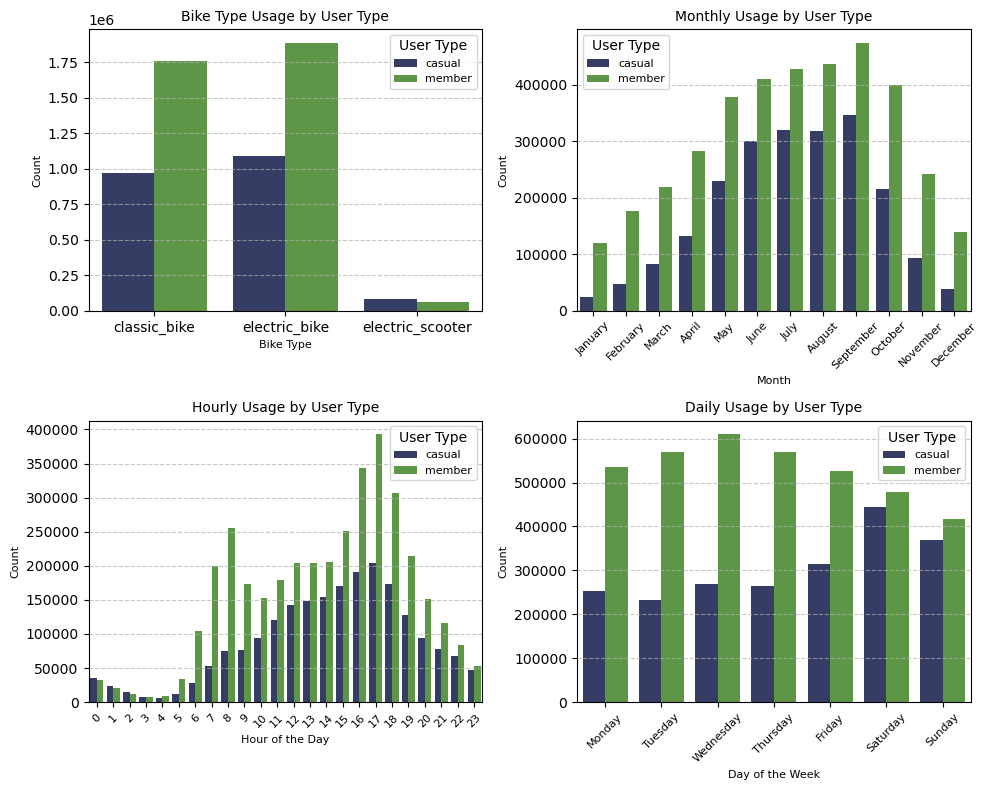

In [ ]:
# plot four aggregated data: 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
# Bike Type Usage by User Type
sns.barplot(data=agg_bike_type, x='rideable_type', y='count', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'}, ax=ax[0,0])
ax[0,0].set_title('Bike Type Usage by User Type', fontsize=10)
ax[0,0].set_xlabel('Bike Type', fontsize=8)
ax[0,0].set_ylabel('Count', fontsize=8)
ax[0,0].legend(title='User Type', fontsize=8)
ax[0,0].grid(axis='y', linestyle='--', alpha=0.7)
for label in ax[0,1].get_xticklabels():
    label.set_fontsize(8)
# Monthly Usage by User Type
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=agg_month, x='month', y='count', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'}, ax=ax[0,1], order=month_order)
ax[0,1].set_title('Monthly Usage by User Type', fontsize=10)
ax[0,1].set_xlabel('Month', fontsize=8)
ax[0,1].set_ylabel('Count', fontsize=8)
ax[0,1].legend(title='User Type', fontsize=8)
ax[0,1].grid(axis='y', linestyle='--', alpha=0.7)
for label in ax[0,1].get_xticklabels():
    label.set_rotation(45)
    label.set_fontsize(8)
# Hourly Usage by User Type
sns.barplot(data=agg_hour, x='hour', y='count', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'} , ax=ax[1,0])
ax[1,0].set_title('Hourly Usage by User Type', fontsize=10)
ax[1,0].set_xlabel('Hour of the Day', fontsize=8)
ax[1,0].set_ylabel('Count', fontsize=8)
ax[1,0].legend(title='User Type', fontsize=8)
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)
for label in ax[1,0].get_xticklabels():
    label.set_rotation(45)
    label.set_fontsize(8)
# Daily Usage by User Type
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=agg_day, x='day_of_week', y='count', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'}, ax=ax[1,1], order=week_order)
ax[1,1].set_title('Daily Usage by User Type', fontsize=10)
ax[1,1].set_xlabel('Day of the Week', fontsize=8)
ax[1,1].set_ylabel('Count', fontsize=8)
ax[1,1].legend(title='User Type', fontsize=8)
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
for label in ax[1,1].get_xticklabels():
    label.set_rotation(45)
    label.set_fontsize(8)
plt.tight_layout()
plt.show()

#### **Conclusions :**
The ratio of classic bike to electric bike usage appears to be similar for both user types.

- For electric scooters, however, casual users seem to use them more frequently than annual members.
- Both user types use Cyclistic frequently from May to October, exhibiting a similar monthly distribution of trips.
- Hours: Annual members' trips peak at 7 and 8 AM and again between 4 PM, 5 PM, and 6 PM (16:00, 17:00, 18:00), which corresponds to typical working hours.
- Hours: Casual riders' trips show peaks between 11 AM and 7 PM (19:00).
- Day of Week: Casual members' trips are higher during weekends.
- Day of Week: Annual members' trips are higher during weekdays.

### **4. Distribution :** 

In [ ]:
# Summary statistics for distance, duration by user type
data.groupby('member_casual')[['duration_min', 'distance_kms']].aggregate(['mean', 'median', 'std']).T.style.format("{:.2f}")

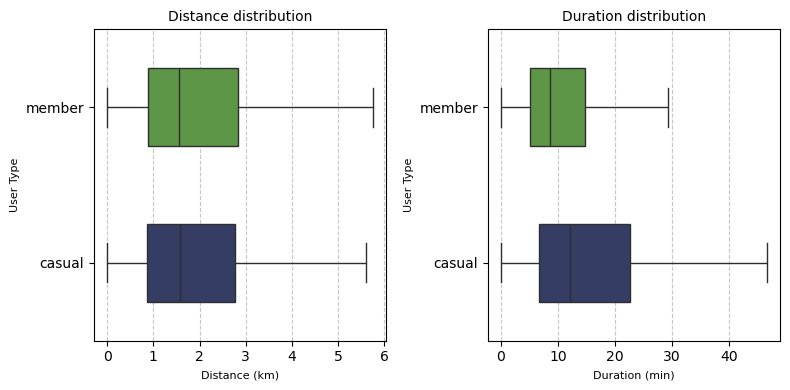

In [ ]:
# plot the distribution of distance_kms and duration_min
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# plot trip distance in kms
sns.boxplot(data=data, x='distance_kms', y='member_casual', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'} , ax=ax[0], showfliers=False, width=0.5)
ax[0].set_title('Distance distribution', fontsize=10)
ax[0].set_xlabel('Distance (km)', fontsize=8)
ax[0].set_ylabel('User Type', fontsize=8)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# plot trip duration in minutes: 
sns.boxplot(data=data, x='duration_min', y='member_casual', hue='member_casual', palette= {"member":'#59A33A', "casual": '#2D386D'} ,ax=ax[1], showfliers=False, width=0.5)
ax[1].set_title('Duration distribution', fontsize=10)
ax[1].set_xlabel('Duration (min)', fontsize=8)
ax[1].set_ylabel('User Type', fontsize=8)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate outliers for distance and duration
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile Range
    upper_bound = round((Q3 + 1.5 * IQR), 2)
    return upper_bound

In [ ]:
# DISTANCE OUTLIERS: 
print("The upper_bound distance for annual members is: ", str(calculate_outliers(data[data['member_casual']=='member'], 'distance_kms'))+' kms')
print("The upper_bound distance for casual riders is: ", str(calculate_outliers(data[data['member_casual']=='casual'], 'distance_kms'))+ ' kms')
print ("The number of outliers for annual members is : ", len(data[data['distance_kms'] > calculate_outliers(data[data['member_casual']=='member'], 'distance_kms')]))
print ("The number of outliers for casual riders is : ", len(data[data['distance_kms'] > calculate_outliers(data[data['member_casual']=='casual'], 'distance_kms')]))


The upper_bound distance for annual members is:  5.76 kms
The upper_bound distance for casual riders is:  5.61 kms
The number of outliers for annual members is :  331144
The number of outliers for casual riders is :  357345


In [ ]:
# DURATION OUTLIERS:
print("The upper_bound duration for annual members is: ", str(calculate_outliers(data[data['member_casual']=='member'], 'duration_min'))+' minutes')
print("The upper_bound duration for casual riders is: ", str(calculate_outliers(data[data['member_casual']=='casual'], 'duration_min'))+ ' minutes')
print ("The number of outliers for annual members is : ", len(data[data['duration_min'] > calculate_outliers(data[data['member_casual']=='member'], 'duration_min')]))
print ("The number of outliers for casual riders is : ", len(data[data['duration_min'] > calculate_outliers(data[data['member_casual']=='casual'], 'duration_min')]))

The upper_bound duration for annual members is:  29.32 minutes
The upper_bound duration for casual riders is:  46.54 minutes
The number of outliers for annual members is :  602165
The number of outliers for casual riders is :  239923


In [ ]:
# LET'S SEE THE % OF OUTLIERS FOR EACH USER TYPE
outliers_distance_member = len(data[data['distance_kms'] > calculate_outliers(data[data['member_casual']=='member'], 'distance_kms')]) \
    / len(data[data['member_casual']=='member']) * 100
outliers_distance_casual = len(data[data['distance_kms'] > calculate_outliers(data[data['member_casual']=='casual'], 'distance_kms')]) \
    / len(data[data['member_casual']=='casual']) * 100
outliers_duration_member = len(data[data['duration_min'] > calculate_outliers(data[data['member_casual']=='member'], 'duration_min')]) \
    / len(data[data['member_casual']=='member']) * 100
outliers_duration_casual = len(data[data['duration_min'] > calculate_outliers(data[data['member_casual']=='casual'], 'duration_min')]) \
    / len(data[data['member_casual']=='casual']) * 100

print(f"Outliers in distance for members: {outliers_distance_member:.2f}%")
print(f"Outliers in distance for casual riders: {outliers_distance_casual:.2f}%")
print(f"Outliers in duration for members: {outliers_duration_member:.2f}%")
print(f"Outliers in duration for casual riders: {outliers_duration_casual:.2f}%")

Outliers in distance for members: 8.93%
Outliers in distance for casual riders: 16.66%
Outliers in duration for members: 16.24%
Outliers in duration for casual riders: 11.18%


#### **Conclusions :**
- Distance: Both user types appear to have a similar distance distribution once outliers are removed. The upper limit for trips seems to be consistent around 5 kilometers for both.
- Distance Outlier Analysis: The number of distance outliers is higher for casual riders, accounting for 17% of their total trips, compared to 9% for annual members.
- Duration: Trip duration appears to be a core difference between casual users and annual members.
- Duration Distribution: The duration distribution clearly shows that casual users' trips are longer, with a mean of 21 minutes and a standard deviation of 45 minutes.

## **IV) Recommandations**

##### **1. Key Differences Between Annual Members and Casual Riders :**
- Annual members account for 63.3% (roughly two-thirds) of total trips, while casual riders make up the remaining 36.7%.
- Two primary factors differentiate these user groups: trip duration and day of week usage.
    - Casual riders generally take longer trips and use the service significantly more often on weekends. \
    They also show a higher incidence of outlier trips exceeding 5 kilometers and tend to use electric scooters more frequently than annual members.
    - In contrast, annual members use the service more frequently during weekdays, with their trips being shorter overall; 50% of these trips last under 9 minutes.\
    Their trip distribution shows two distinct peaks around 7 AM and 5 PM, aligning with typical commuting hours.

##### **2. Actions :**
- Create special weekend-only membership tiers or discounted weekend passes.
- Provide discounts or capped pricing for rides exceeding a certain duration \
(e.g., "First 30 minutes free, then a lower per-minute rate for members," or "No extra charges for rides up to 60 minutes for members").
- Run targeted promotions for annual memberships during their peak usage months. This could include limited-time discounts or bonus ride credits for new sign-ups.
- Run targeted promotions for annual memberships during their peak usage months. This could include limited-time discounts or bonus ride credits for new sign-ups.

## **V) PowerBI Analysis**

In [ ]:
# Export data for PowerBI analysis: 
data.to_csv('cyclistic_data_analysis.csv', index=False)

In [ ]:
geographic_data = final_df[['ride_id', 'start_station_name', 'start_station_id',	
                            'end_station_name',	'end_station_id',
                            'start_lat', 'start_lng', 
                            'end_lat', 'end_lng']].copy()
geographic_data.to_csv('cyclistic_geographic_data.csv', index=False)